In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [3]:
df

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


##### 🔽 데이터 현황을 확인하고 싶다면? 아래 코드를 통해 확인해보세요.

In [4]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


면세점 이외    2772
Name: 판매유형별, dtype: int64

### 📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

* 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
*  describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
* 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
* 데이터는 위에서 제공된 데이터를 사용합니다.
* 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [5]:
# rename 함수 :열 이름 '데이터' -> '백만'
df.rename(columns={'데이터':'백만'}, inplace=True)

In [6]:
# str.slice() : 열 '시점'에서 연도, 분기 추출
# pd.to_numeric() : 문자형 -> 수치형
df['연도'] = pd.to_numeric(df['시점'].str.slice(0, 4))
df['분기'] = pd.to_numeric(df['시점'].str.slice(5, 6))

In [7]:
round(df.describe(), 2)

,백만,연도,분기
count,2772.00,2772.00,2772.00
mean,1613.12,2019.27,2.41
std,4273.43,1.60,1.11
min,-10003.00,2017.00,1.00
25%,41.75,2018.00,1.00
50%,291.50,2019.00,2.00
75%,1181.00,2021.00,3.00
max,47689.00,2022.00,4.00


#### ※ 알 수 있는 정보
- 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액의 평균은 1613.12(백만)원이다.
- 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매가 가장 적은 해는 2017년이다.
- 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매가 가장 많은 해는 2022년이다.
- 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매는 평균적으로 2019년도에 이루어졌다고 볼 수 있다.
- 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매가 가장 적은 분기는 1분기이다.
- 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매가 가장 많은 분기는 4분기이다.
- 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매는 평균적으로 2분기와 3분기 사이에 이루어졌다고 볼 수 있다.

### 📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.
- 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
- pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [8]:
pd.pivot_table(df, index='국가(대륙)별', columns = '연도', values = '백만', aggfunc = 'sum')

# index : 행 위치에 들어갈 열
# columns : 열 위치에 들어갈 열
# values : 데이터로 사용할 열
# aggfunc : 데이터 집계함수

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


### 📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.
- 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [9]:
df_20 = df[(df['연도'] == 2020)]

In [10]:
df_product = df_20.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().unstack()
df_product

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


<AxesSubplot:xlabel='국가(대륙)별', ylabel='백만'>

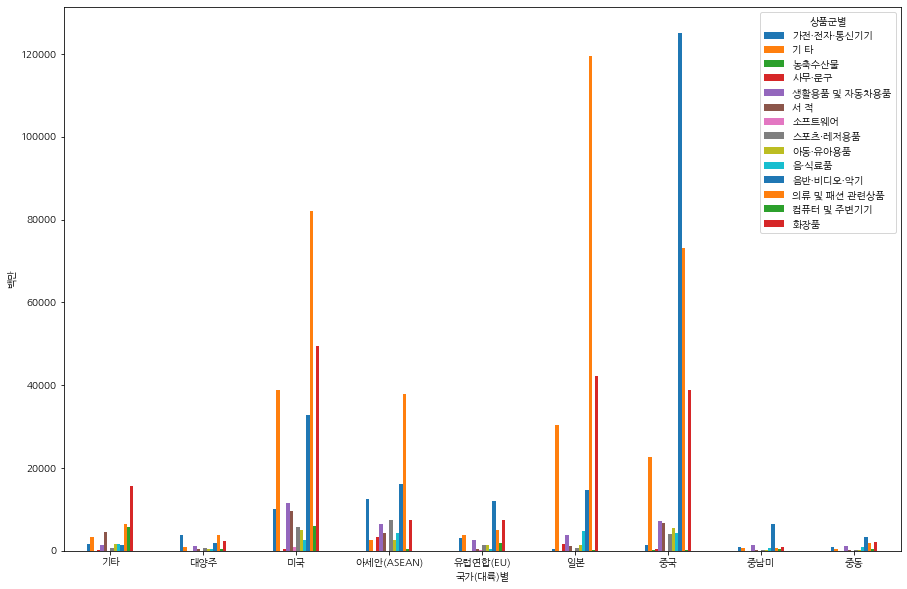

In [11]:
df_product.plot.bar(rot=0, ylabel='백만', figsize = (15, 10))

- 대양주에선 가전, 전자 통신기기가 2020년의 온라인 해외판매 상품군 중 가장 큰 값을 가지는 것으로 보인다.
- 미국에선 의류 및 패션 관련상품이 2020년의 온라인 해외판매 상품군 중 가장 큰 값을 가지는 것으로 보인다.
- 아세안에선 의류 및 패션 관련상품이 2020년의 온라인 해외판매 상품군 중 가장 큰 값을 가지는 것으로 보인다.
- 유럽연합에선 음반, 비디오, 악기가 2020년의 온라인 해외판매 상품군 중 가장 큰 값을 가지는 것으로 보인다.
- 일본에선 의류 및 패션 관련상품이 2020년의 온라인 해외판매 상품군 중 가장 큰 값을 가지는 것으로 보인다.
- 중국에선 음반, 비디오, 악기가 2020년의 온라인 해외판매 상품군 중 가장 큰 값을 가지는 것으로 보인다.
- 중남미에선 음반, 비디오, 악기가 2020년의 온라인 해외판매 상품군 중 가장 큰 값을 가지는 것으로 보인다.
- 중동에선 음반, 비디오, 악기가 2020년의 온라인 해외판매 상품군 중 가장 큰 값을 가지는 것으로 보인다.

In [12]:
# 직전 해인 2019년과 비교하기 위해 2019, 2020년도만 불러옴
df_19_20 = df[(df['연도'] == 2019) | (df['연도'] == 2020)]

In [13]:
df_group1920 = df_19_20.groupby(['국가(대륙)별', '연도'])['백만'].sum().unstack()
df_group1920

연도,2019,2020
국가(대륙)별,,
기타,40950,44438
대양주,13191,16255
미국,186617,255384
아세안(ASEAN),82930,105360
유럽연합(EU),39008,39865
일본,189330,220730
중국,210418,289446
중남미,12981,12563
중동,9325,11467


<AxesSubplot:xlabel='국가(대륙)별', ylabel='백만'>

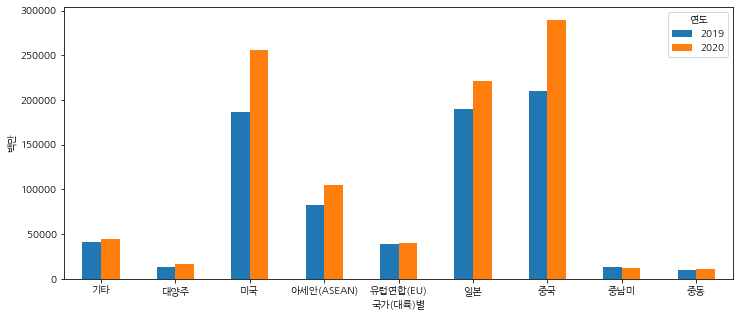

In [14]:
df_group1920.plot.bar(rot=0, ylabel='백만', figsize = (12, 5))

- 위의 df_group1920와 그래프를 살펴보면 중남미를 제외한 모든 국가(대륙)이 2019년도에 비해 2020년의 온라인 해외판매액이 증가한 것을 볼 수 있다.
- 그 중 미국과 중국의 차이가 눈에 띄는 것을 볼 수 있다.

### 📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.
- 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
- 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

In [15]:
df1= df[(df['국가(대륙)별'] == '미국') & (df['연도'] < 2022)]
df_us = df1[(df1['상품군별'] == '의류 및 패션 관련상품') | (df1['상품군별'] == '화장품') | (df1['상품군별'] == '음반·비디오·악기')]

In [16]:
df_us.groupby(['연도', '상품군별']).sum().unstack()

백만                            분기                 
상품군별 음반·비디오·악기 의류 및 패션 관련상품    화장품 음반·비디오·악기 의류 및 패션 관련상품 화장품
연도                                                           
2017      8628        49891  31237        10           10  10
2018     13858        47353  38537        10           10  10
2019     19596        55125  41786        10           10  10
2020     32919        82154  49446        10           10  10
2021     41841       100662  38665        10           10  10

<AxesSubplot:xlabel='연도'>

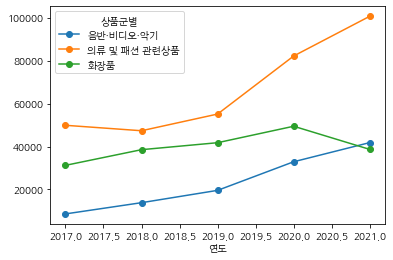

In [17]:
df_us.groupby(['연도', '상품군별'])['백만'].sum().unstack().plot(marker="o")

In [18]:
df2= df[(df['국가(대륙)별'] == '중국') & (df['연도'] < 2022)]
df_chi = df2[(df2['상품군별'] == '의류 및 패션 관련상품') | (df2['상품군별'] == '화장품') | (df2['상품군별'] == '음반·비디오·악기')]

In [19]:
df_chi.groupby(['연도', '상품군별']).sum().unstack()

백만                            분기                 
상품군별 음반·비디오·악기 의류 및 패션 관련상품    화장품 음반·비디오·악기 의류 및 패션 관련상품 화장품
연도                                                           
2017      8437        84248  34608        10           10  10
2018     15046        87611  43873        10           10  10
2019     36193        77844  59445        10           10  10
2020    125078        73068  38855        10           10  10
2021     62874        64078  30472        10           10  10

<AxesSubplot:xlabel='연도'>

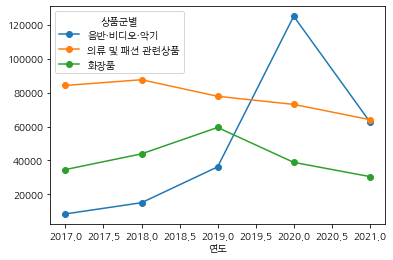

In [20]:
df_chi.groupby(['연도', '상품군별'])['백만'].sum().unstack().plot(marker="o")

In [21]:
df3 = df[(df['국가(대륙)별'] == '일본') & (df['연도'] < 2022)]
df_jap = df3[(df3['상품군별'] == '의류 및 패션 관련상품') | (df3['상품군별'] == '화장품') | (df3['상품군별'] == '음반·비디오·악기')]

In [22]:
df_jap.groupby(['연도', '상품군별']).sum().unstack()

백만                            분기                 
상품군별 음반·비디오·악기 의류 및 패션 관련상품    화장품 음반·비디오·악기 의류 및 패션 관련상품 화장품
연도                                                           
2017      2824        89085   6333        10           10  10
2018      7018       134742   5276        10           10  10
2019      8712       131538  10906        10           10  10
2020     14738       119452  42215        10           10  10
2021     15940       118959  77124        10           10  10

<AxesSubplot:xlabel='연도'>

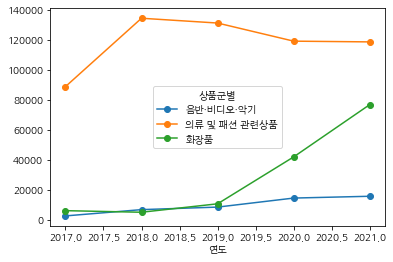

In [23]:
df_jap.groupby(['연도', '상품군별'])['백만'].sum().unstack().plot(marker="o")

<AxesSubplot:title={'center':'국가(대륙)별 = 일본'}, xlabel='연도', ylabel='백만'>

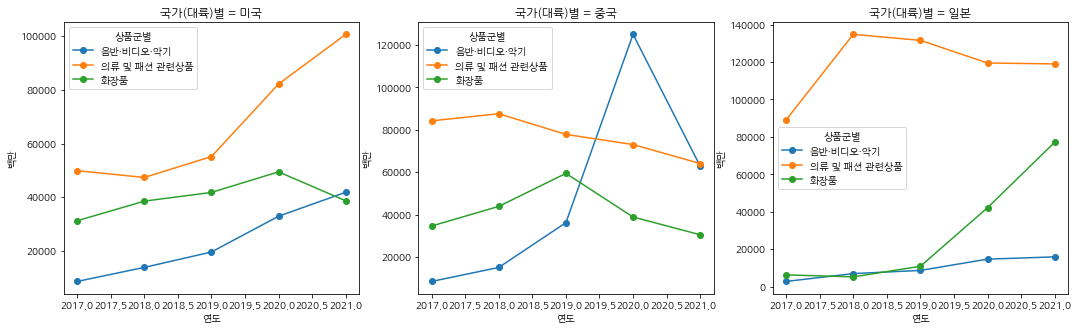

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

df_us.groupby(['연도', '상품군별'])['백만'].sum().unstack().plot(title='국가(대륙)별 = 미국', ylabel = '백만', ax=ax[0], marker="o")
df_chi.groupby(['연도', '상품군별'])['백만'].sum().unstack().plot(title='국가(대륙)별 = 중국', ylabel = '백만',ax=ax[1], marker="o")
df_jap.groupby(['연도', '상품군별'])['백만'].sum().unstack().plot(title='국가(대륙)별 = 일본', ylabel = '백만',ax=ax[2], marker="o")

In [25]:
df4 = df[(df['국가(대륙)별'] == '미국') | (df['국가(대륙)별'] == '중국') | (df['국가(대륙)별'] == '일본')]
df4

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
919,일본,기 타,면세점 이외,2021.2/4,10843,2021,2
920,일본,기 타,면세점 이외,2021.3/4,9616,2021,3
921,일본,기 타,면세점 이외,2021.4/4,10435,2021,4
922,일본,기 타,면세점 이외,2022.1/4,8967,2022,1


In [26]:
df5 = df4[(df4['상품군별'] == '의류 및 패션 관련상품') | (df4['상품군별'] == '화장품') | (df4['상품군별'] == '음반·비디오·악기')]
df5

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3
811,일본,화장품,면세점 이외,2021.4/4,22555,2021,4
812,일본,화장품,면세점 이외,2022.1/4,26664,2022,1


In [27]:
df_prod = df5[df5['연도'] < 2022][['국가(대륙)별', '상품군별', '연도', '백만']]
df_prod

,국가(대륙)별,상품군별,연도,백만
110,미국,음반·비디오·악기,2017,1922
111,미국,음반·비디오·악기,2017,1778
112,미국,음반·비디오·악기,2017,2281
113,미국,음반·비디오·악기,2017,2647
114,미국,음반·비디오·악기,2018,2362
...,...,...,...,...
807,일본,화장품,2020,11994
808,일본,화장품,2021,12421
809,일본,화장품,2021,18768
810,일본,화장품,2021,23380


In [97]:
import seaborn as sns

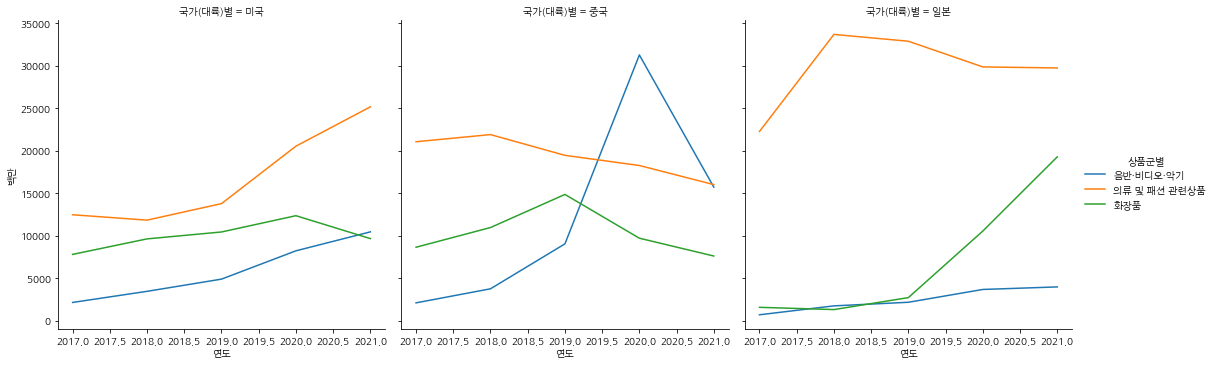

In [98]:
sns.relplot(data=df_prod, x='연도', y='백만', col='국가(대륙)별', hue='상품군별', kind='line', ci=None)